# <div style="text-align: center;">Project 1: Data & Visualization</div>

In [2]:
# Packages
install.packages("tidyverse")
install.packages("ggrepel")
install.packages("ggcorrplot")
install.packages("DT")
install.packages("gridExtra")
install.packages("sf")
install.packages("modeest")
install.packages("factoextra")
install.packages("kableExtra")
install.packages("reshape2")
install.packages("knitr")
install.packages("caret")
install.packages("car")
install.packages("lubridate")

# Libraries
library("tidyverse")
library("ggrepel")
library("ggcorrplot")
library("DT")
library("gridExtra")
library("sf")
library("modeest")
library("knitr")
library("factoextra")
library("reshape2")
library("kableExtra")
library("knitr")
library("stringr")
library("caret")
library("car")
library("lubridate")


The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//Rtmp5hGpXd/downloaded_packages

The downloaded binary packages 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Linking to GEOS 3.13.0, GDAL 3.8.5, PROJ 9.5.1; sf_use_s2() is TRUE

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Loading req

In [4]:
# Define base directory
# base_dir <- "../../../../../../../Desktop/COVID-19/"
# base_dir <- "C:/Users/leona/OneDrive/CSMS/Data Mining (CS7331)/Projects/Project 1/COVID-19/"
base_dir <- "/Users/salissa/Desktop/Data Mining/Datasets/COVID-19"

# Use file.path() for better compatibility
global_mobility_path <- file.path(base_dir, "Global_Mobility_Report.csv")
covid_cases_census_path <- file.path(base_dir, "c19_census.csv")
covid_cases_tx_path <- file.path(base_dir, "c19_tx.csv")

In [6]:
# Custom function to read CSV files
read_data <- function(file_path, dataset_name) {
  if (file.exists(file_path)) {
    cat(paste0("\n--- Loading ", dataset_name, " ---\n"))
    # Suppress col_type messages
    return(read_csv(file_path, show_col_types = FALSE))
  } else {
    stop(paste0("Error: File not found -> ", file_path))
  }
}

# Load datasets
global_mobility <- read_data(global_mobility_path, "Global Mobility Data")
covid_cases_census <- read_data(covid_cases_census_path, "COVID-19 Cases and Census Data")
covid_cases_tx <- read_data(covid_cases_tx_path, "COVID-19 Cases for Texas")

cat("\n--- All datasets successfully loaded! ---\n")


--- Loading Global Mobility Data ---

--- Loading COVID-19 Cases and Census Data ---

--- Loading COVID-19 Cases for Texas ---

--- All datasets successfully loaded! ---


In [8]:
# Randomly display 10 rows global mobility data
global_mobility %>%
  sample_n(10)

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IT,Italy,Apulia,Province of Barletta-Andria-Trani,NA,IT-BT,NA,2020-06-02,-5,-38,205,-56,-64,7
CA,Canada,Quebec,Gatineau,NA,NA,NA,2021-01-21,-57,-25,-27,-60,-54,22
US,United States,Louisiana,Richland Parish,NA,NA,22083,2021-01-07,NA,NA,NA,-8,-15,NA
IT,Italy,Liguria,Province of La Spezia,NA,IT-SP,NA,2020-07-12,-10,-10,128,74,19,-6
PL,Poland,Lower Silesian Voivodeship,Dzierżoniów County,NA,NA,NA,2020-05-15,-7,-3,NA,-43,-28,10
EC,Ecuador,El Oro,Pasaje,NA,NA,NA,2020-12-04,-1,NA,-1,-30,-24,14
CO,Colombia,Caldas,Manizales,NA,NA,NA,2021-01-01,-76,-61,-61,-61,-78,22
DK,Denmark,North Denmark Region,Mariagerfjord Municipality,NA,NA,NA,2020-11-01,17,-6,NA,NA,-3,NA
US,United States,Arkansas,Crittenden County,NA,NA,05035,2020-09-15,9,-1,NA,-7,-22,3


In [10]:
# View of data
glimpse(global_mobility)

Rows: 3,991,405
Columns: 14
$ country_region_code                                <chr> "AE", "AE", "AE", "…
$ country_region                                     <chr> "United Arab Emirat…
$ sub_region_1                                       <chr> NA, NA, NA, NA, NA,…
$ sub_region_2                                       <chr> NA, NA, NA, NA, NA,…
$ metro_area                                         <chr> NA, NA, NA, NA, NA,…
$ iso_3166_2_code                                    <chr> NA, NA, NA, NA, NA,…
$ census_fips_code                                   <chr> NA, NA, NA, NA, NA,…
$ date                                               <date> 2020-02-15, 2020-0…
$ retail_and_recreation_percent_change_from_baseline <dbl> 0, 1, -1, -2, -2, -…
$ grocery_and_pharmacy_percent_change_from_baseline  <dbl> 4, 4, 1, 1, 0, 1, 2…
$ parks_percent_change_from_baseline                 <dbl> 5, 4, 5, 5, 4, 6, 6…
$ transit_stations_percent_change_from_baseline      <dbl> 0, 1, 1, 0, -1, 1, …
$ workplaces

In [12]:
# Rename columns and filter dataset for key variables
global_mobility_filtered <- global_mobility %>%
  select(
    date,
    country = country_region,
    region_1 = sub_region_1,
    region_2 = sub_region_2,
    retail_change = retail_and_recreation_percent_change_from_baseline,
    grocery_change = grocery_and_pharmacy_percent_change_from_baseline,
    workplace_change = workplaces_percent_change_from_baseline,
    residential_change = residential_percent_change_from_baseline,
    transit_change = transit_stations_percent_change_from_baseline
  ) %>%
  select(date,
         country,
         region_1,
         region_2,
         retail_change,
         grocery_change,
         workplace_change,
         residential_change,
         transit_change)

In [14]:
# View only selected variables are displayed
global_mobility_filtered %>%
  head()

date,country,region_1,region_2,retail_change,grocery_change,workplace_change,residential_change,transit_change
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-02-15,United Arab Emirates,NA,NA,0,4,2,1,0
2020-02-16,United Arab Emirates,NA,NA,1,4,2,1,1
2020-02-17,United Arab Emirates,NA,NA,-1,1,2,1,1
2020-02-18,United Arab Emirates,NA,NA,-2,1,2,1,0
2020-02-19,United Arab Emirates,NA,NA,-2,0,2,1,-1
2020-02-20,United Arab Emirates,NA,NA,-2,1,1,1,1


In [16]:
# Verify column name change
colnames(global_mobility_filtered)

[1] "date"               "country"            "region_1"          
[4] "region_2"           "retail_change"      "grocery_change"    
[7] "workplace_change"   "residential_change" "transit_change"

In [18]:
# View filtered variables
glimpse(global_mobility_filtered)

Rows: 3,991,405
Columns: 9
$ date               <date> 2020-02-15, 2020-02-16, 2020-02-17, 2020-02-18, 20…
$ country            <chr> "United Arab Emirates", "United Arab Emirates", "Un…
$ region_1           <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ region_2           <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ retail_change      <dbl> 0, 1, -1, -2, -2, -2, -3, -2, -1, -3, -3, -2, 1, 1,…
$ grocery_change     <dbl> 4, 4, 1, 1, 0, 1, 2, 2, 3, 0, 2, 1, 5, 5, 7, 10, 7,…
$ workplace_change   <dbl> 2, 2, 2, 2, 2, 1, -1, 3, 4, 3, 3, 3, 3, 1, 5, 4, 4,…
$ residential_change <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, …
$ transit_change     <dbl> 0, 1, 1, 0, -1, 1, 0, -2, -1, -1, -2, -2, -1, -1, -…


In [24]:
# Filter for Texas, since we will focus on this region,
# before converting to factors
texas_mobility_data <- global_mobility_filtered %>%
  filter(country == "United States" & region_1 == "Texas")

In [26]:
# Confirming filtering success
glimpse(texas_mobility_data)

Rows: 64,162
Columns: 9
$ date               <date> 2020-02-15, 2020-02-16, 2020-02-17, 2020-02-18, 20…
$ country            <chr> "United States", "United States", "United States", …
$ region_1           <chr> "Texas", "Texas", "Texas", "Texas", "Texas", "Texas…
$ region_2           <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ retail_change      <dbl> 3, 8, 6, -1, -2, -1, 2, 3, 4, 2, 6, 10, 11, 10, 10,…
$ grocery_change     <dbl> 3, 3, 2, -1, 0, -2, 0, 1, 1, 1, 2, 6, 6, 8, 8, 9, 7…
$ workplace_change   <dbl> 1, 1, -18, 1, 3, 1, 3, 4, 1, 3, 3, 4, 2, 1, 3, 2, 4…
$ residential_change <dbl> -1, -1, 4, 0, 1, 1, -1, -1, 0, 0, -1, -1, -2, -2, -…
$ transit_change     <dbl> 3, 4, 2, 3, 0, -1, 2, 3, 3, 2, 3, 5, 7, 7, 9, 7, 4,…


In [28]:
# Apply data type changes
texas_mobility_data <- texas_mobility_data %>%
  # Convert categorical variables from character to factor
  mutate(
    country = as.factor(country),
    region_1 = as.factor(region_1),
    region_2 = as.factor(region_2),
    # Data already in correct format
    # The following line is just for clarify
    date = as.Date(date),
  )

In [30]:
# Confirming data type change
glimpse(texas_mobility_data)

Rows: 64,162
Columns: 9
$ date               <date> 2020-02-15, 2020-02-16, 2020-02-17, 2020-02-18, 20…
$ country            <fct> United States, United States, United States, United…
$ region_1           <fct> Texas, Texas, Texas, Texas, Texas, Texas, Texas, Te…
$ region_2           <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ retail_change      <dbl> 3, 8, 6, -1, -2, -1, 2, 3, 4, 2, 6, 10, 11, 10, 10,…
$ grocery_change     <dbl> 3, 3, 2, -1, 0, -2, 0, 1, 1, 1, 2, 6, 6, 8, 8, 9, 7…
$ workplace_change   <dbl> 1, 1, -18, 1, 3, 1, 3, 4, 1, 3, 3, 4, 2, 1, 3, 2, 4…
$ residential_change <dbl> -1, -1, 4, 0, 1, 1, -1, -1, 0, 0, -1, -1, -2, -2, -…
$ transit_change     <dbl> 3, 4, 2, 3, 0, -1, 2, 3, 3, 2, 3, 5, 7, 7, 9, 7, 4,…


In [32]:
# Check for missing values in each column
missing_values <- texas_mobility_data %>%
  summarize(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(cols = everything(), names_to = "column", values_to = "missing_count") %>%
  mutate(missing_pct = (missing_count / nrow(texas_mobility_data)) * 100)

# View missing values summary
print(missing_values)

# A tibble: 9 × 3
  column             missing_count missing_pct
  <chr>                      <int>       <dbl>
1 date                           0       0    
2 country                        0       0    
3 region_1                       0       0    
4 region_2                     343       0.535
5 retail_change              23368      36.4  
6 grocery_change             26865      41.9  
7 workplace_change            4789       7.46 
8 residential_change         34106      53.2  
9 transit_change             34109      53.2  


In [34]:
# Remove rows with any missing values in the mobility columns
texas_mobility_data <- texas_mobility_data %>%
  drop_na(region_2, retail_change, grocery_change, workplace_change, residential_change, transit_change)

# Check how much data is left
cat("Remaining rows after missing value removal:", nrow(texas_mobility_data), "\n")

# Check how much data is left after removal
summary(texas_mobility_data)

Remaining rows after missing value removal: 18194 


      date                     country       region_1    
 Min.   :2020-02-15   United States:18194   Texas:18194  
 1st Qu.:2020-05-08                                      
 Median :2020-07-31                                      
 Mean   :2020-08-06                                      
 3rd Qu.:2020-11-07                                      
 Max.   :2021-01-22                                      
                                                         
           region_2     retail_change    grocery_change    workplace_change
 Bexar County  :  343   Min.   :-91.00   Min.   :-79.000   Min.   :-88.00  
 Dallas County :  343   1st Qu.:-21.00   1st Qu.:-11.000   1st Qu.:-36.00  
 El Paso County:  343   Median :-12.00   Median : -5.000   Median :-27.00  
 Harris County :  343   Mean   :-13.11   Mean   : -4.091   Mean   :-26.87  
 Hidalgo County:  343   3rd Qu.: -4.00   3rd Qu.:  3.000   3rd Qu.:-17.00  
 Midland County:  343   Max.   :152.00   Max.   : 69.000   Max.   : 27.00  
 (Ot

In [36]:
# Identify duplicate rows
duplicates <- texas_mobility_data %>%
  filter(duplicated(.))

# Count duplicate rows
num_duplicates <- nrow(duplicates)

# View duplicates
cat("Number of duplicate rows:", num_duplicates, "\n")

Number of duplicate rows: 0 


In [38]:
# Remove duplicates only if they exist
if (num_duplicates > 0) {
  texas_mobility_data <- texas_mobility_data %>%
    distinct()
  cat("Duplicates removed. New dataset size:", nrow(texas_mobility_data), "rows\n")
} else {
  cat("No duplicate rows found.\n")
}

No duplicate rows found.


In [40]:
# Define a function to count outliers using IQR
count_outliers <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  sum(x < (Q1 - 1.5 * IQR_value) | x > (Q3 + 1.5 * IQR_value), na.rm = TRUE)
}

# Create a summary table of outliers for each mobility change column
outlier_summary <- texas_mobility_data %>%
  summarize(across(
    c(retail_change, grocery_change, workplace_change, residential_change, transit_change),
    count_outliers,
    .names = "{.col}_outliers"
  )) %>%
  pivot_longer(everything(), names_to = "Column", values_to = "Outlier_Count")

# Print the table
print(outlier_summary, width=Inf)

# A tibble: 5 × 2
  Column                      Outlier_Count
  <chr>                               <int>
1 retail_change_outliers                521
2 grocery_change_outliers               531
3 workplace_change_outliers             269
4 residential_change_outliers           187
5 transit_change_outliers               157


In [42]:
# Custom function check if value is outlier using IQR
is_not_outlier <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  x >= (Q1 - 1.5 * IQR_value) & x <= (Q3 + 1.5 * IQR_value)
}

# Remove rows containing outliers
texas_mobility_data_cleaned <- texas_mobility_data %>%
  filter(
    is_not_outlier(retail_change) &
    is_not_outlier(grocery_change) &
    is_not_outlier(workplace_change) &
    is_not_outlier(residential_change) &
    is_not_outlier(transit_change)
  )

# How many rows were removed
rows_removed <- nrow(texas_mobility_data) - nrow(texas_mobility_data_cleaned)
cat("Number of rows removed due to outliers:", rows_removed, "\n")

Number of rows removed due to outliers: 1108 


In [44]:
# Stats after cleaning data
summary(texas_mobility_data_cleaned)

      date                     country       region_1    
 Min.   :2020-02-15   United States:17086   Texas:17086  
 1st Qu.:2020-05-13                                      
 Median :2020-08-03                                      
 Mean   :2020-08-07                                      
 3rd Qu.:2020-11-05                                      
 Max.   :2021-01-22                                      
                                                         
           region_2     retail_change    grocery_change    workplace_change
 Bexar County  :  331   Min.   :-46.00   Min.   :-32.000   Min.   :-64.0   
 Harris County :  331   1st Qu.:-21.00   1st Qu.:-11.000   1st Qu.:-35.0   
 Dallas County :  330   Median :-12.00   Median : -5.000   Median :-27.0   
 Ector County  :  328   Mean   :-12.37   Mean   : -3.995   Mean   :-25.8   
 Nueces County :  328   3rd Qu.: -4.00   3rd Qu.:  3.000   3rd Qu.:-17.0   
 Tarrant County:  327   Max.   : 21.00   Max.   : 24.000   Max.   : 11.0   
 (Ot

In [46]:
# Function to compute key statistics
compute_mobility_stats <- function(data, variables) {
  data %>%
    summarize(across(
      all_of(variables),
      list(
        Range = ~ max(.x, na.rm = TRUE) - min(.x, na.rm = TRUE),
        Mode = ~ mfv(.x),
        Mean = ~ mean(.x, na.rm = TRUE),
        Median = ~ median(.x, na.rm = TRUE),
        Variance = ~ var(.x, na.rm = TRUE),
        SD = ~ sd(.x, na.rm = TRUE)
      ),
      .names = "{.col}_{.fn}"
    ))
}

# Define mobility variables
mobility_variables <- c("retail_change", "grocery_change", "workplace_change", "residential_change", "transit_change")

# Compute statistics
mobility_stats_table <- compute_mobility_stats(texas_mobility_data_cleaned, mobility_variables)

# Convert to long format for better readability
mobility_stats_long <- mobility_stats_table %>%
  pivot_longer(cols = everything(),
               names_to = c("Variable", "Statistic"),
               names_pattern = "(.*)_(Range|Mode|Mean|Median|Variance|SD)",
               values_to = "Value") %>%
  pivot_wider(names_from = Statistic, values_from = Value)

# Print the table
print(mobility_stats_long, width=Inf)

# A tibble: 5 × 7
  Variable           Range  Mode   Mean Median Variance    SD
  <chr>              <dbl> <dbl>  <dbl>  <dbl>    <dbl> <dbl>
1 retail_change         67   -10 -12.4     -12    157.  12.5 
2 grocery_change        56    -5  -3.99     -5     97.4  9.87
3 workplace_change      75   -33 -25.8     -27    184.  13.6 
4 residential_change    29     7   8.83      9     30.0  5.47
5 transit_change       120    -3 -11.0      -9    396.  19.9 


In [48]:
# Display a static, nicely formatted table
kable(mobility_stats_long, caption = "Summary Statistics for Mobility Data")



Table: Summary Statistics for Mobility Data

|Variable           | Range| Mode|       Mean| Median|  Variance|        SD|
|:------------------|-----:|----:|----------:|------:|---------:|---------:|
|retail_change      |    67|  -10| -12.365914|    -12| 157.14722| 12.535838|
|grocery_change     |    56|   -5|  -3.994733|     -5|  97.41981|  9.870148|
|workplace_change   |    75|  -33| -25.801124|    -27| 184.17947| 13.571274|
|residential_change |    29|    7|   8.833489|      9|  29.97116|  5.474592|
|transit_change     |   120|   -3| -11.008779|     -9| 396.20665| 19.904940|

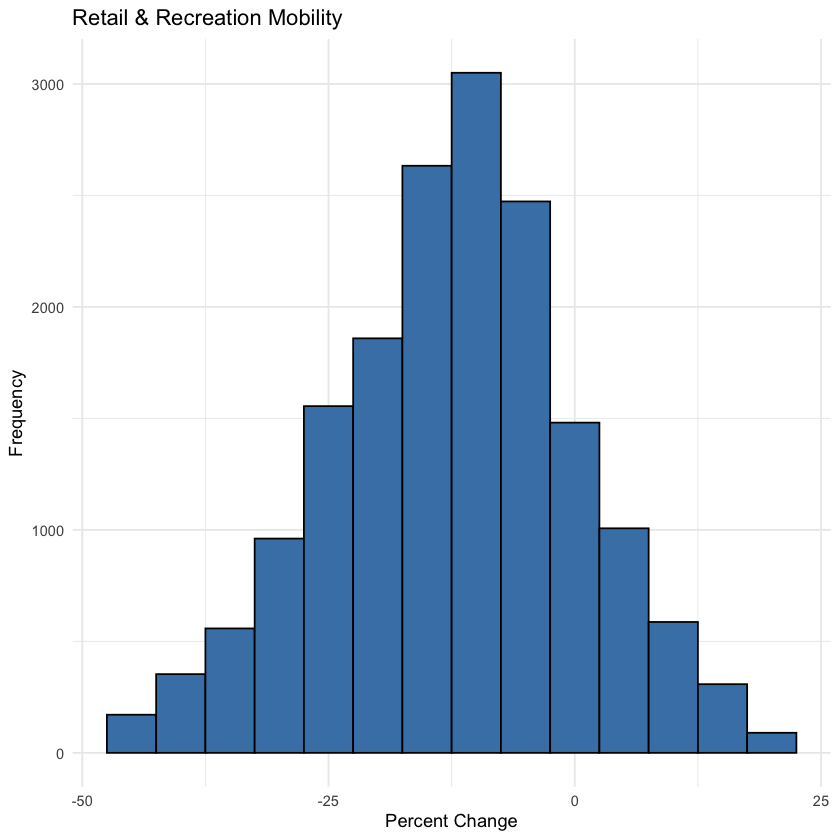

In [50]:
# 1. Retail and Recreation Percent Change Histogram
ggplot(texas_mobility_data_cleaned,
       aes(x = retail_change)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "black") +
  theme_minimal() +
  labs(title = "Retail & Recreation Mobility",
       x = "Percent Change",
       y = "Frequency")

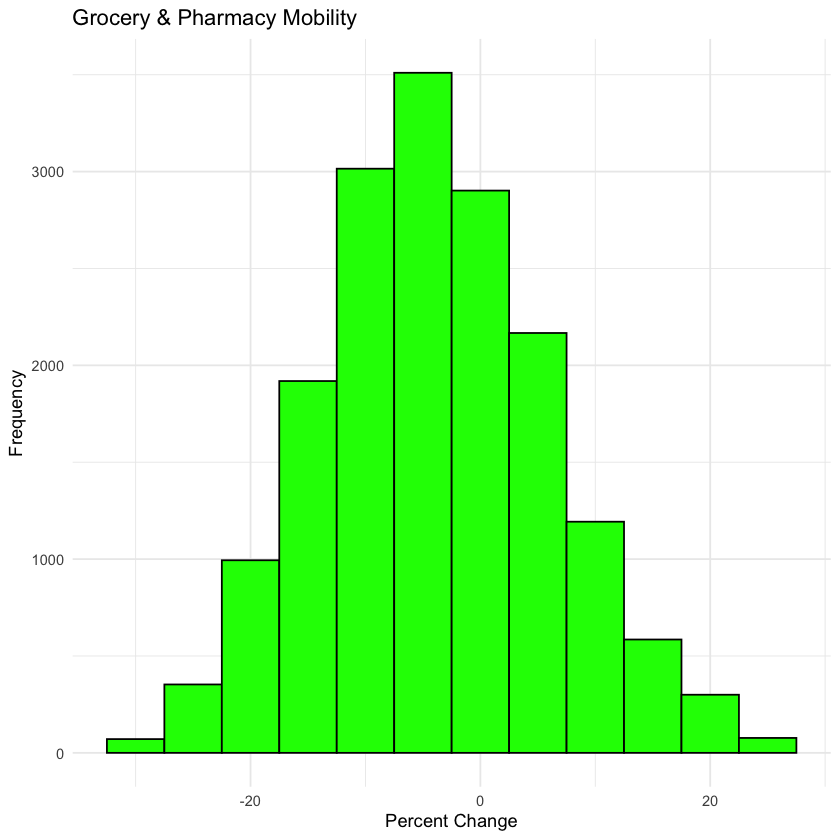

In [52]:
# 2. Grocery and Pharmacy Percent Change Histogram
ggplot(texas_mobility_data_cleaned,
       aes(x = grocery_change)) +
  geom_histogram(binwidth = 5, fill = "green", color = "black") +
  theme_minimal() +
  labs(title = "Grocery & Pharmacy Mobility",
       x = "Percent Change",
       y = "Frequency")

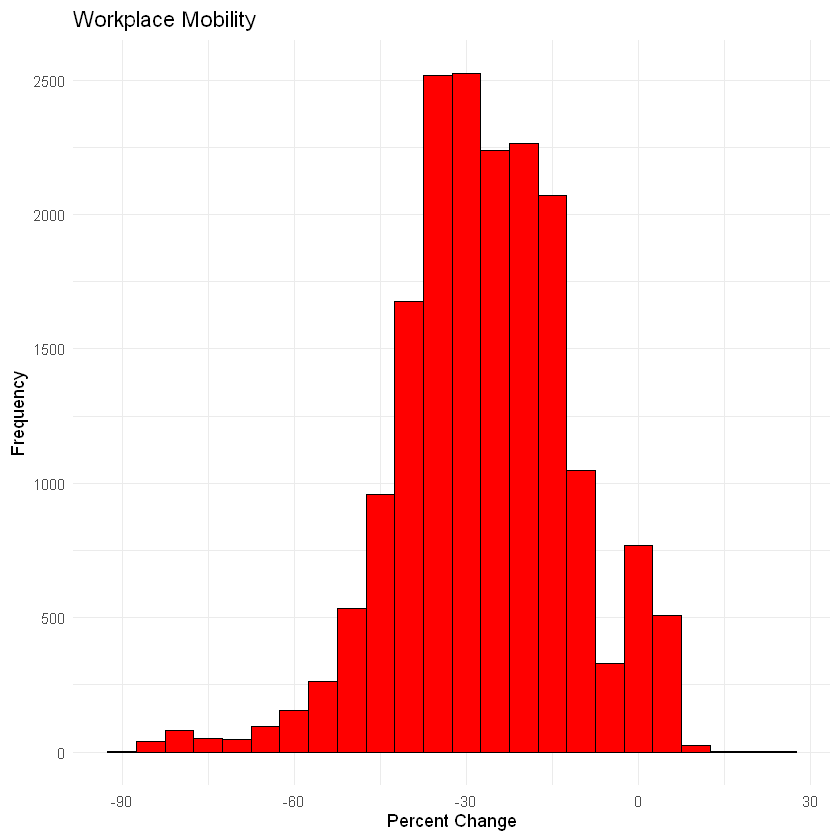

In [25]:
# Workplace Mobility Histogram
ggplot(texas_mobility_data, aes(x = workplace_change)) +
  geom_histogram(binwidth = 5, fill = "red", color = "black") +
  theme_minimal() +
  labs(title = "Workplace Mobility", x = "Percent Change", y = "Frequency")

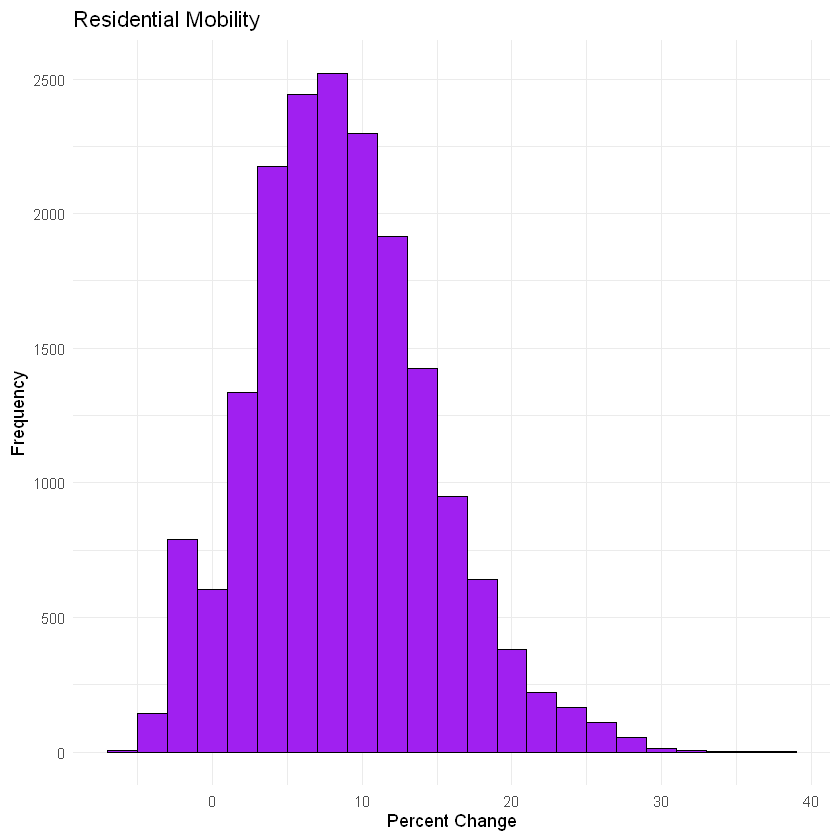

In [26]:
# Residential Mobility Histogram
ggplot(texas_mobility_data, aes(x = residential_change)) +
  geom_histogram(binwidth = 2, fill = "purple", color = "black") +
  theme_minimal() +
  labs(title = "Residential Mobility", x = "Percent Change", y = "Frequency")

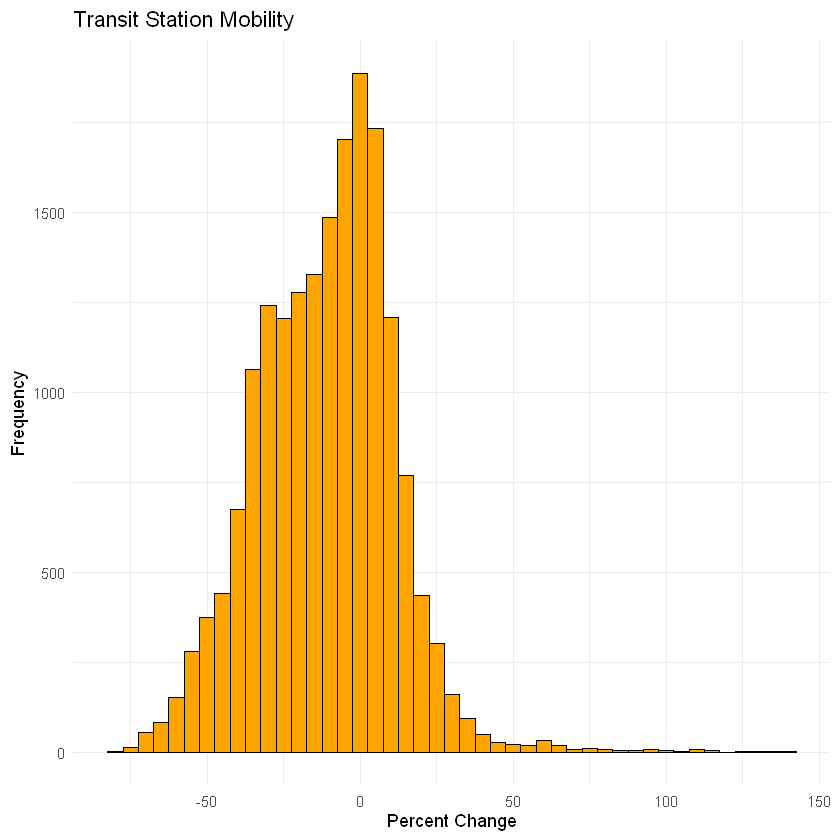

In [27]:
# Transit Station Mobility Histogram
ggplot(texas_mobility_data, 
       aes(x = transit_change)) +
  geom_histogram(binwidth = 5, fill = "orange", color = "black") +
  theme_minimal() +
  labs(title = "Transit Station Mobility",
       x = "Percent Change",
       y = "Frequency")

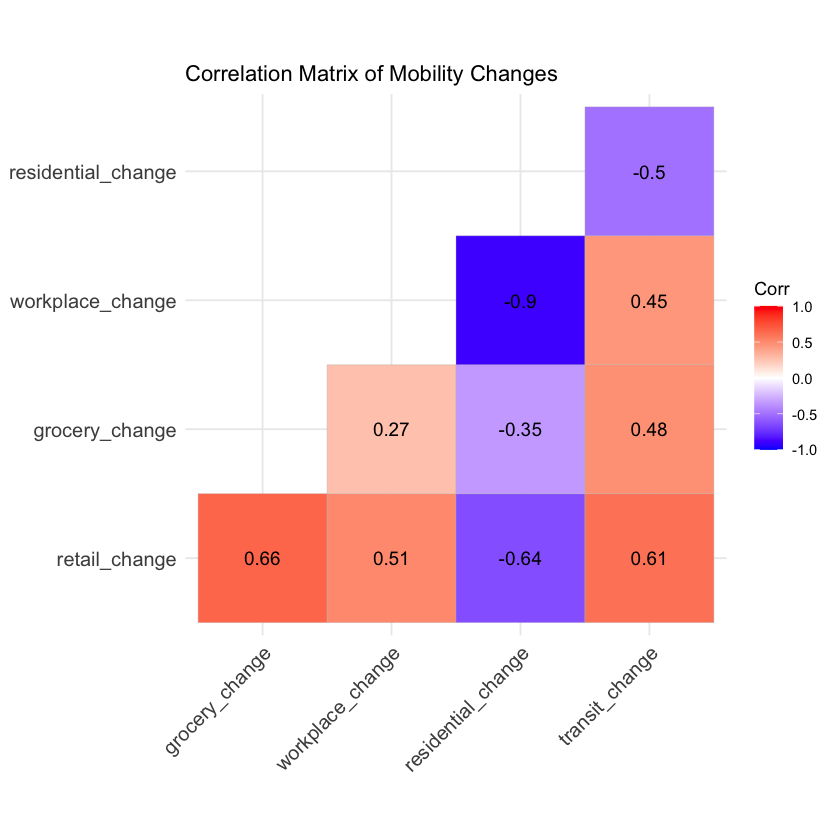

In [54]:
# Selecting variables for matrix
mobility_vars <- texas_mobility_data_cleaned %>%
  select(retail_change,
         grocery_change,
         workplace_change,
         residential_change,
         transit_change)

# Compute correlation matrix
cor_matrix <- cor(mobility_vars, use = "complete.obs")

# Plot heatmap
ggcorrplot(cor_matrix, method = "square", type = "lower", lab = TRUE,
           colors = c("blue", "white", "red"),
           title = "Correlation Matrix of Mobility Changes")

In [56]:
# Compute county-level averages for retail and workplace mobility
county_mobility <- texas_mobility_data_cleaned %>%
  group_by(region_2) %>%
  summarize(
    avg_retail = mean(retail_change, na.rm = TRUE),
    avg_workplace = mean(workplace_change, na.rm = TRUE)
  ) %>%
  arrange(avg_retail)

# View first few rows
head(county_mobility)

region_2,avg_retail,avg_workplace
<fct>,<dbl>,<dbl>
Maverick County,-27.31020,-31.44898
Travis County,-25.96980,-36.43289
Val Verde County,-23.91176,-32.29412
Webb County,-23.37778,-25.69524
El Paso County,-22.26380,-30.12577
Brazos County,-22.24906,-32.83774


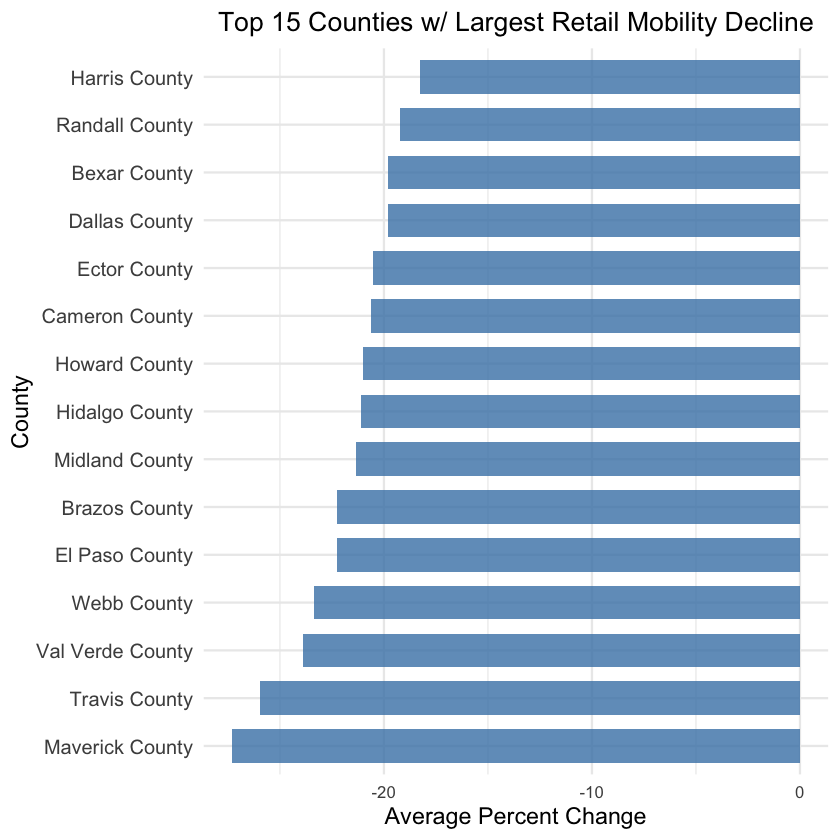

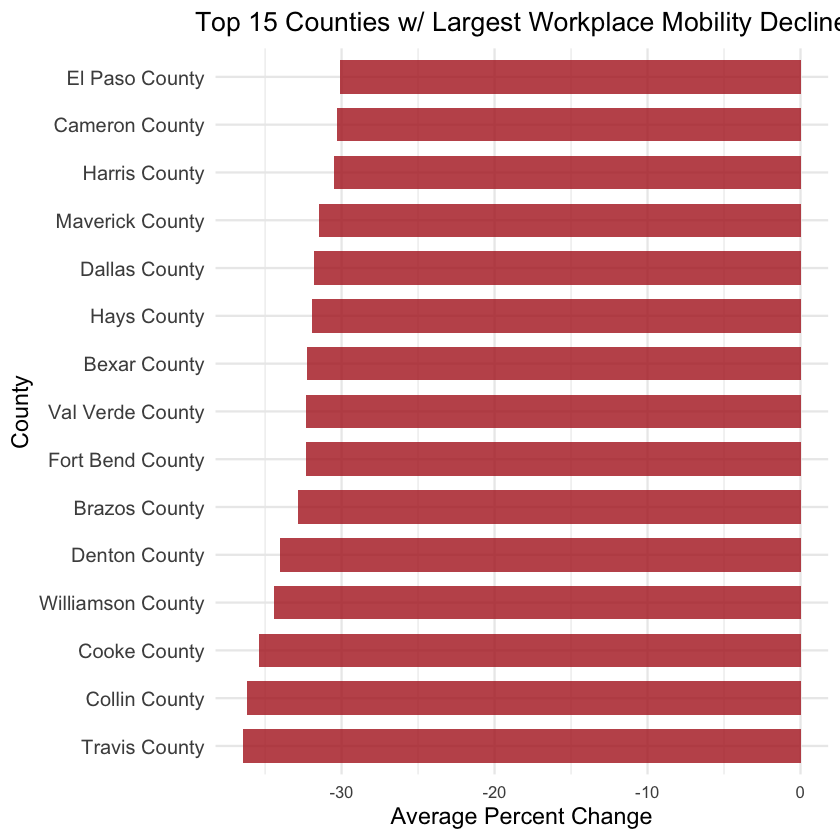

In [58]:
# Top 15 hardest-hit counties 
top_counties <- county_mobility %>%
  slice_min(avg_retail, n = 15)

# Bar plot retail mobility
ggplot(top_counties, aes(x = reorder(region_2, avg_retail), y = avg_retail)) +
  geom_col(fill = "steelblue", alpha = 0.8, width = 0.7) +  
  coord_flip() +
  theme_minimal(base_size = 14) + 
  labs(title = "Top 15 Counties w/ Largest Retail Mobility Decline",
       x = "County", y = "Average Percent Change") +
  theme(plot.title = element_text(hjust = 0.5, size = 16),  
        axis.text.y = element_text(size = 12),  
        axis.text.x = element_text(size = 10)) 

# Bar plot workplace mobility 
top_counties <- county_mobility %>%
  slice_min(avg_workplace, n = 15)

# Create the bar plot
ggplot(top_counties, aes(x = reorder(region_2, avg_workplace), y = avg_workplace)) +
  geom_col(fill = "firebrick", alpha = 0.8, width = 0.7) +
  coord_flip() +
  theme_minimal(base_size = 14) +
  labs(title = "Top 15 Counties w/ Largest Workplace Mobility Decline",
       x = "County", y = "Average Percent Change") +
  theme(plot.title = element_text(hjust = 0.5, size = 16),
        axis.text.y = element_text(size = 12),
        axis.text.x = element_text(size = 10))

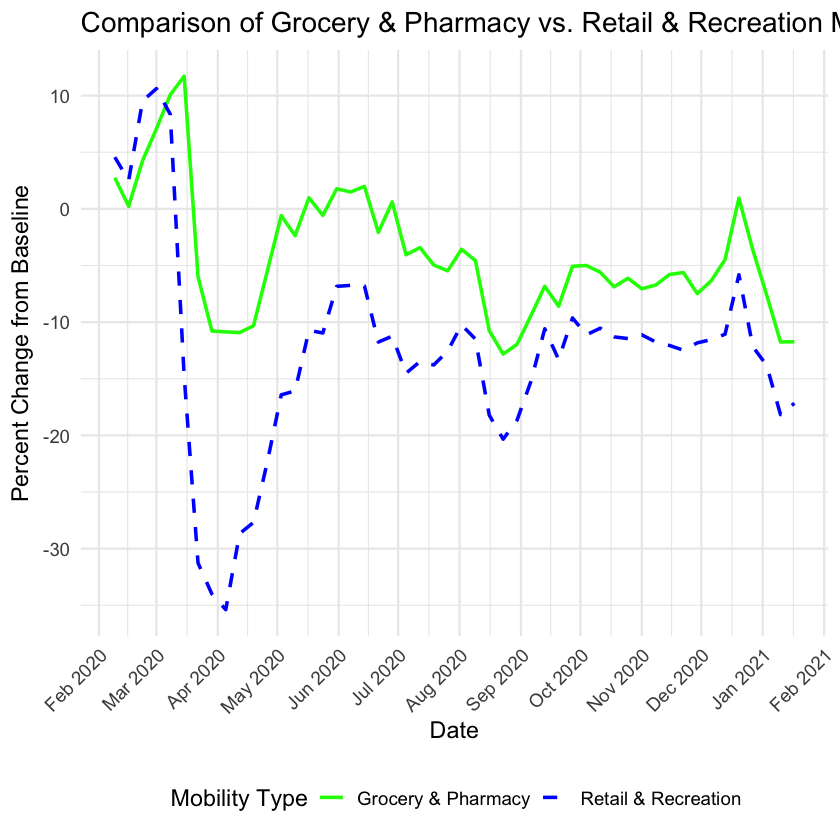

In [60]:
# Aggregate/week for smoother trends
mobility_trends <- texas_mobility_data_cleaned %>%
  mutate(week = floor_date(date, "week")) %>%
  group_by(week) %>%
  summarize(
    avg_grocery = mean(grocery_change, na.rm = TRUE),
    avg_retail = mean(retail_change, na.rm = TRUE)
  )

# Improved line plot with weekly data
ggplot(mobility_trends, aes(x = week)) +
  geom_line(aes(y = avg_grocery, color = "Grocery & Pharmacy"), linewidth = 1) +
  geom_line(aes(y = avg_retail, color = "Retail & Recreation"), linewidth = 1, linetype = "dashed") +
  theme_minimal(base_size = 14) +  
  scale_color_manual(values = c("Grocery & Pharmacy" = "green", "Retail & Recreation" = "blue")) +  
  labs(title = "Comparison of Grocery & Pharmacy vs. Retail & Recreation Mobility",  
       x = "Date", y = "Percent Change from Baseline", color = "Mobility Type") +  
  theme(legend.position = "bottom",
        legend.margin = margin(10, 10, 10, 10),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y")

In [62]:
# Filtering data for major metropolitan areas and rural areas
metro_areas <- c("Harris County", "Dallas County", "Travis County", "Bexar County", "Tarrant County", "Collin County", "Denton County") 
texas_mobility_data_cleaned$metro_area <- ifelse(texas_mobility_data_cleaned$region_2 %in% metro_areas, 
                                                 "Metro", "Rural")
# As factor
texas_mobility_data_cleaned$metro_area <- as.factor(texas_mobility_data_cleaned$metro_area)

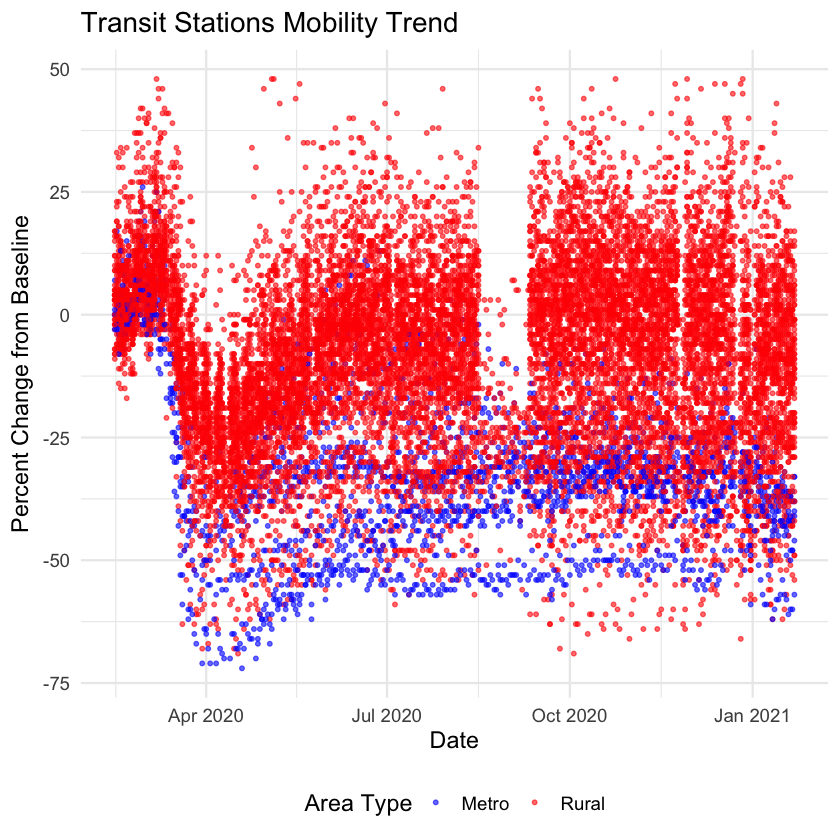

In [64]:
# Scatter plot for transit stations
ggplot(texas_mobility_data_cleaned, aes(x = date, y = transit_change, 
                                       color = metro_area)) +
  geom_point(alpha = 0.6, size = 1) +
  labs(title = "Transit Stations Mobility Trend", x = "Date", 
       y = "Percent Change from Baseline",
       color = "Area Type") +
  theme_minimal(base_size = 14) +
  scale_color_manual(values = c("Metro" = "blue", "Rural" = "red")) +
  theme(legend.position = "bottom")

In [34]:
# Group data by metro area and summarize mobility trends
summary_stats <- texas_mobility_data_cleaned %>%
  group_by(metro_area) %>%
  summarize(
    min_change = min(transit_change, na.rm = TRUE),
    avg_change = mean(transit_change, na.rm = TRUE),
    latest_change = transit_change[which.max(date)]
  )

print(summary_stats)

# A tibble: 2 × 4
  metro_area min_change avg_change latest_change
  <fct>           <dbl>      <dbl>         <dbl>
1 Metro             -72     -32.3            -33
2 Rural             -69      -7.82           -54


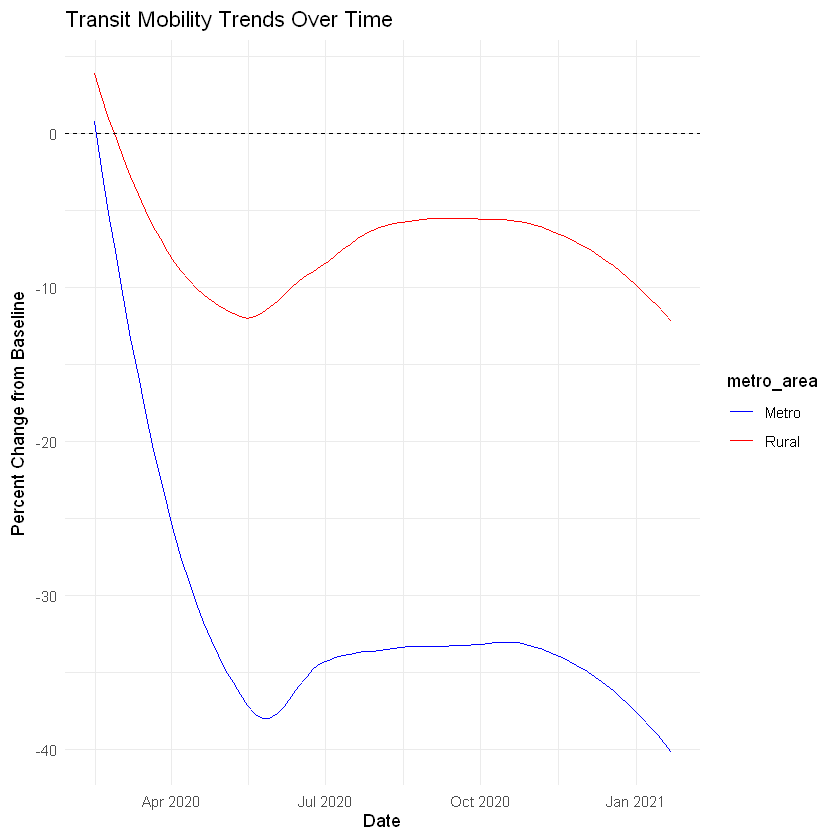

In [35]:
# Visual of trends
ggplot(texas_mobility_data_cleaned, 
       aes(x = as.Date(date), y = transit_change, color = metro_area)) +
  geom_line(stat = "smooth", formula = y ~ x, method = "loess", se = FALSE) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  labs(title = "Transit Mobility Trends Over Time", 
       x = "Date", 
       y = "Percent Change from Baseline") +
  scale_color_manual(values = c("Metro" = "blue", "Rural" = "red")) +
  theme_minimal()

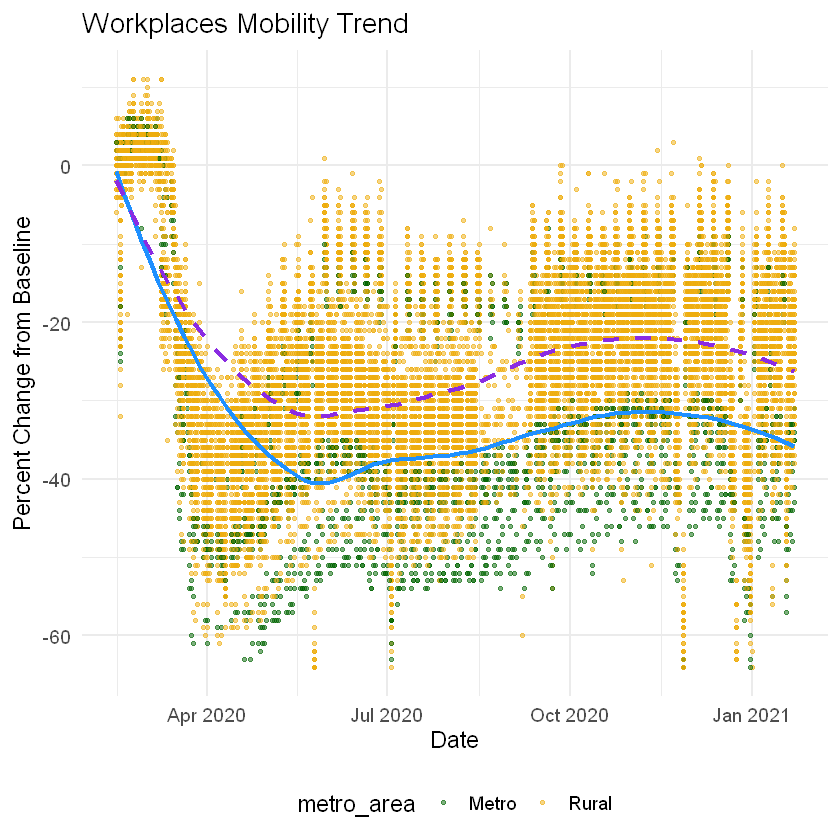

In [36]:
# Scatter plot for workplaces
ggplot(texas_mobility_data_cleaned, aes(x = as.Date(date), y = workplace_change, 
                                       color = metro_area)) +
  geom_point(alpha = 0.5, size = 1) +
 
  geom_smooth(data = subset(texas_mobility_data_cleaned, metro_area == "Metro"),
              method = "loess", formula = y ~ x, se = FALSE, linetype = "solid", linewidth = 1.2, color = "#1E90FF") + 
  geom_smooth(data = subset(texas_mobility_data_cleaned, metro_area == "Rural"),
              method = "loess", formula = y ~ x, se = FALSE, linetype = "dashed", linewidth = 1.2, color = "#8A2BE2") +
  labs(title = "Workplaces Mobility Trend", x = "Date", 
       y = "Percent Change from Baseline") +
  theme_minimal(base_size = 14) +
  scale_color_manual(values = c("Metro" = "darkgreen", "Rural" = "darkgoldenrod2")) +
  theme(legend.position = "bottom")

In [37]:
# Summary stats workplace mobility
summary_stats <- texas_mobility_data_cleaned %>%
  group_by(metro_area) %>%
  summarize(
    min_change = min(workplace_change, na.rm = TRUE),
    avg_change = mean(workplace_change, na.rm = TRUE),
    latest_change = workplace_change[which.max(date)]
  )

print(summary_stats)

# A tibble: 2 × 4
  metro_area min_change avg_change latest_change
  <fct>           <dbl>      <dbl>         <dbl>
1 Metro             -64      -32.8           -34
2 Rural             -64      -24.8           -14


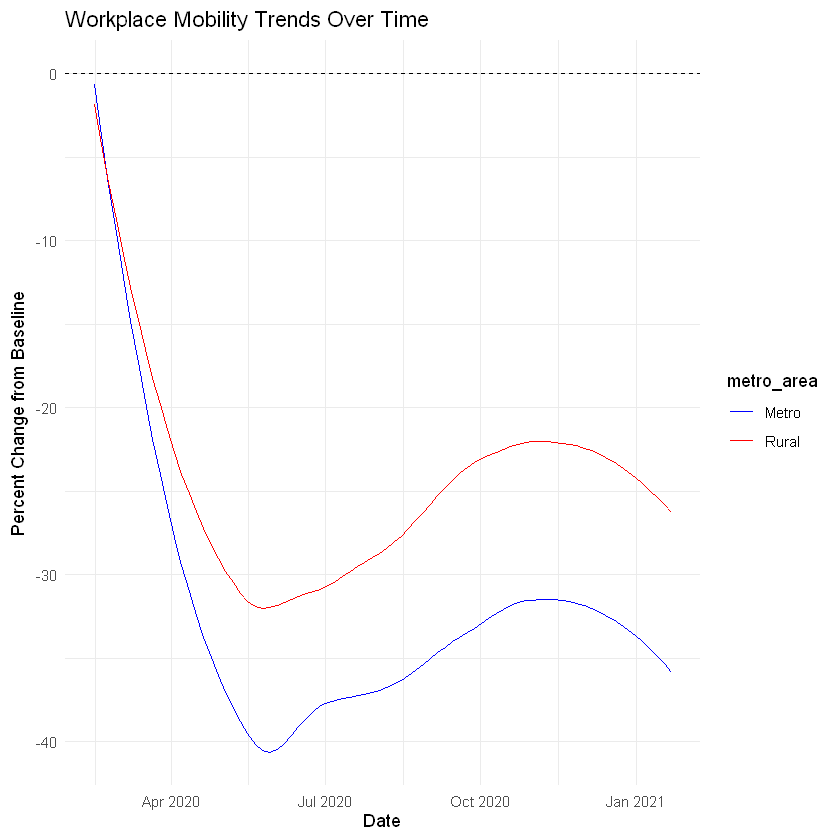

In [38]:
# Visual of trends
ggplot(texas_mobility_data_cleaned, aes(x = as.Date(date), y = workplace_change, color = metro_area)) +
  geom_line(stat = "smooth", formula = y ~ x, method = "loess", se = FALSE) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  labs(title = "Workplace Mobility Trends Over Time", x = "Date", y = "Percent Change from Baseline") +
  scale_color_manual(values = c("Metro" = "blue", "Rural" = "red")) +
  theme_minimal()

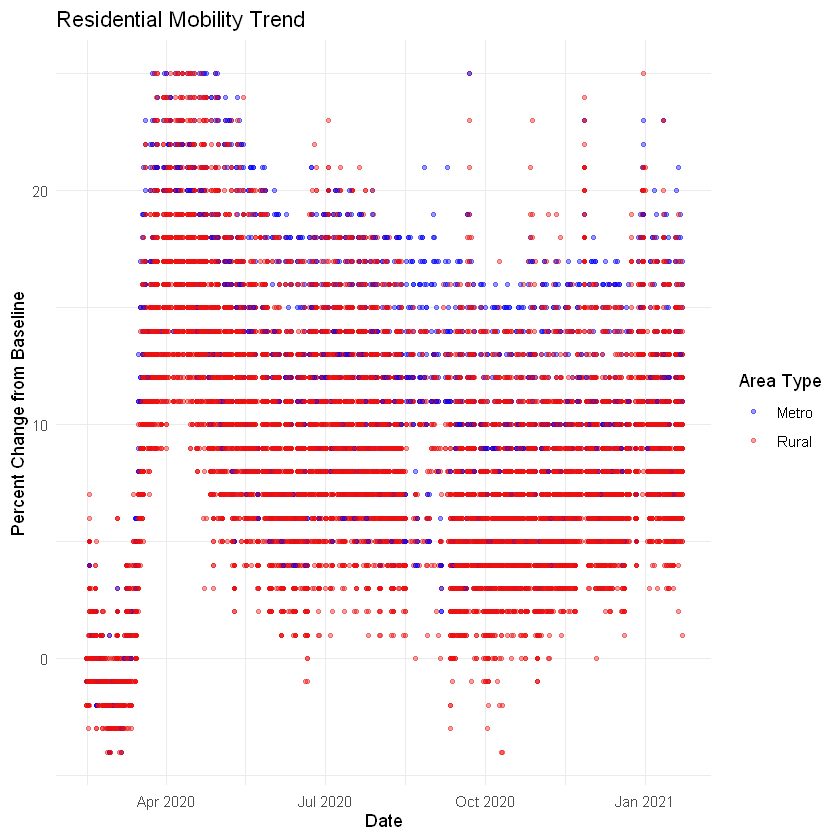

In [39]:
# Scatter plot for residential mobility
ggplot(texas_mobility_data_cleaned, 
       aes(x = as.Date(date), y = residential_change, color = metro_area)) +  
  geom_point(alpha = 0.4, size = 1) +  
  labs(title = "Residential Mobility Trend", 
       x = "Date", 
       y = "Percent Change from Baseline",
       color = "Area Type") + 
  theme_minimal() +
  scale_color_manual(values = c("Metro" = "blue1", "Rural" = "#ec1010")) 

In [40]:
# Summary stats residential
summary_stats <- texas_mobility_data_cleaned %>%
  group_by(metro_area) %>%
  summarize(
    min_change = min(residential_change, na.rm = TRUE),
    avg_change = mean(residential_change, na.rm = TRUE),
    latest_change = residential_change[which.max(date)]
  )

print(summary_stats)

# A tibble: 2 × 4
  metro_area min_change avg_change latest_change
  <fct>           <dbl>      <dbl>         <dbl>
1 Metro              -4      11.5             12
2 Rural              -4       8.44             7


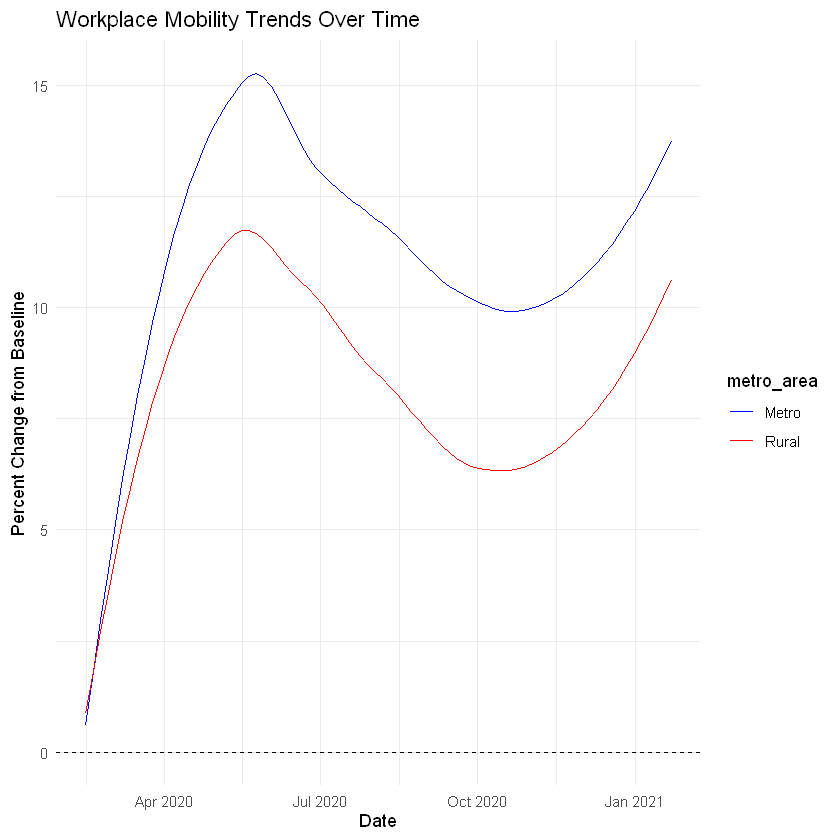

In [41]:
# Visual of trends
ggplot(texas_mobility_data_cleaned, aes(x = as.Date(date), y = residential_change, color = metro_area)) +
  geom_line(stat = "smooth", formula = y ~ x, method = "loess", se = FALSE) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  labs(title = "Workplace Mobility Trends Over Time", x = "Date", y = "Percent Change from Baseline") +
  scale_color_manual(values = c("Metro" = "blue", "Rural" = "red")) +
  theme_minimal()

## Graduate Level Analysis: by Juan Carlos Dominguez

Importance of components:
                          PC1    PC2     PC3     PC4     PC5
Standard deviation     1.7822 0.9880 0.70246 0.52511 0.28005
Proportion of Variance 0.6352 0.1953 0.09869 0.05515 0.01569
Cumulative Proportion  0.6352 0.8305 0.92917 0.98431 1.00000
                          PC1        PC2        PC3         PC4         PC5
retail_change      -0.4846627 -0.2578719 -0.1615188 -0.79081060 -0.21710466
grocery_change     -0.3761564 -0.6192678 -0.4583354  0.51225647  0.05035651
workplace_change   -0.4518306  0.5456696 -0.1068647  0.29443145 -0.63244275
residential_change  0.4890856 -0.4392028  0.1328170  0.01991946 -0.74152481
transit_change     -0.4245619 -0.2436290  0.8571931  0.15850943  0.02206616


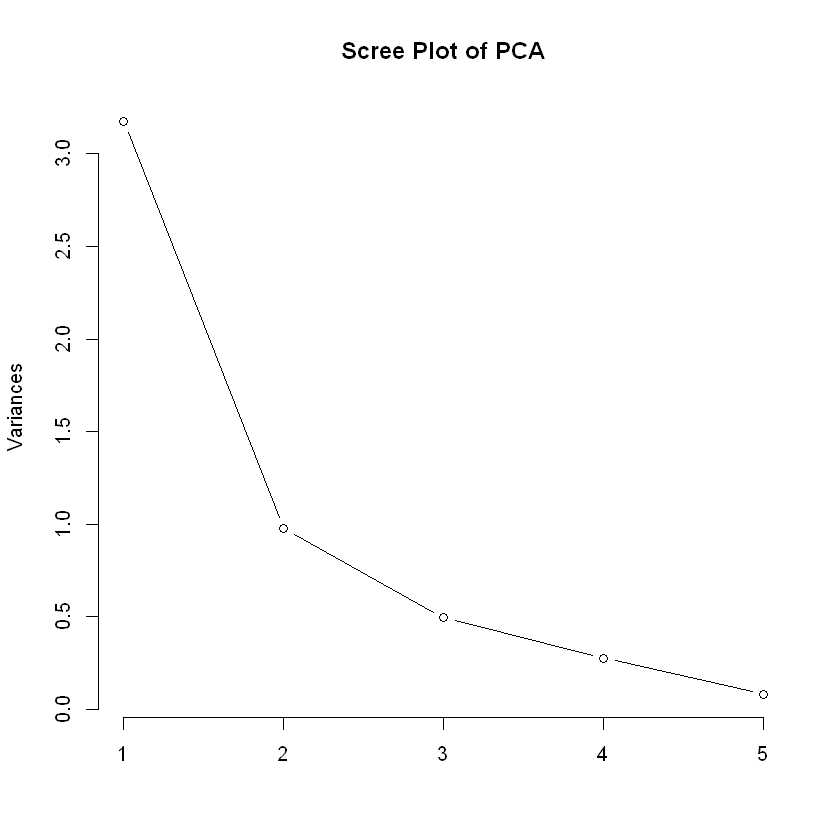

In [42]:
# Prepare data for PCA
mobility_features <- texas_mobility_data_cleaned %>%
  select(
    retail_change,
    grocery_change,
    workplace_change,
    residential_change,
    transit_change
  )

# Standardize data PCA
mobility_data_scaled <- scale(mobility_features)

# Perform PCA
pca <- prcomp(mobility_data_scaled, center = TRUE, scale. = TRUE)

# PCA Summary 
pca_summary <- summary(pca)
print(pca_summary)

# View PCA loadings - eigenvectors
print(pca$rotation)

# Scree plot to visualize variance
screeplot(pca, type = "lines", main = "Scree Plot of PCA")

   PC Standard_Deviation Variance_Explained Cumulative_Variance
1 PC1          1.7821721         0.63522751           0.6352275
2 PC2          0.9880482         0.19524785           0.8304754
3 PC3          0.7024639         0.09869111           0.9291665
4 PC4          0.5251115         0.05514842           0.9843149
5 PC5          0.2800456         0.01568511           1.0000000


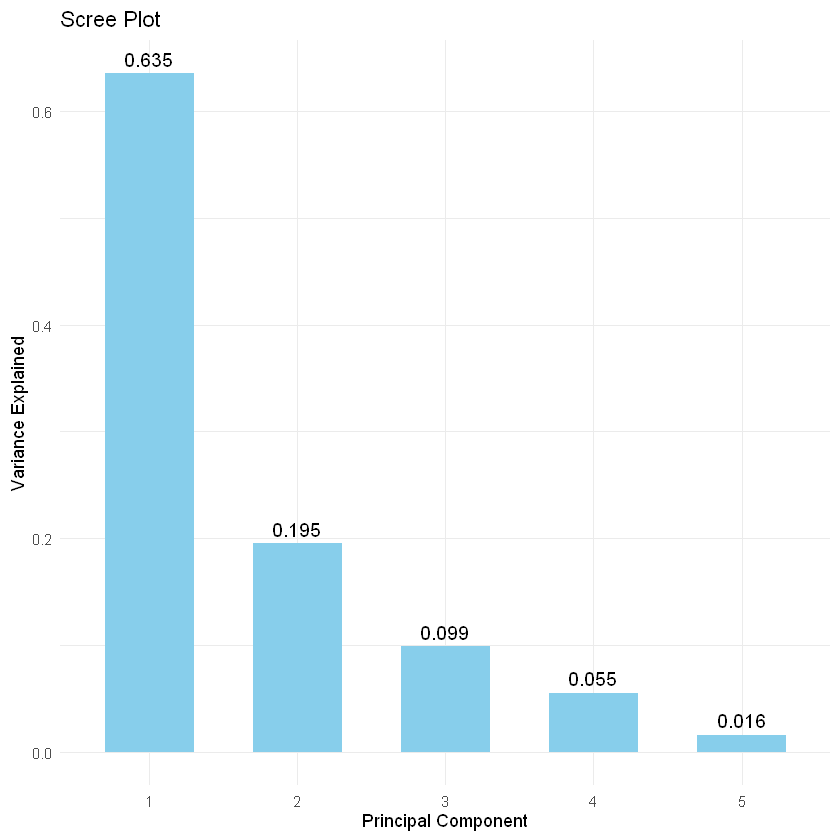

In [43]:
# Summary stats for PCA 
summary_stats_pca <- data.frame(
  PC = paste0("PC", 1:length(pca$sdev)),  
  Standard_Deviation = pca$sdev,  
  Variance_Explained = (pca$sdev^2) / sum(pca$sdev^2),  
  Cumulative_Variance = cumsum((pca$sdev^2) / sum(pca$sdev^2))  
)
 # View PCA stats
print(summary_stats_pca)  

# Extract PCA loadings 
pca_loadings <- as.data.frame(pca$rotation)
pca_loadings$Variable <- rownames(pca_loadings)
rownames(pca_loadings) <- NULL  

# Extract PCA scores &  county information
biplot_data <- as.data.frame(pca$x) %>%
  mutate(County = texas_mobility_data_cleaned$region_2)

# Scree Plot 
scree_data <- data.frame(
  PC = 1:length(pca$sdev),
  Variance = (pca$sdev^2) / sum(pca$sdev^2)
)

# Ensure PC is a factor 
scree_data$PC <- factor(scree_data$PC)

# Visualize Scree Plot
ggplot(scree_data, aes(x = PC, y = Variance)) +
  geom_bar(stat = "identity", fill = "skyblue", width = 0.6) +
  geom_text(aes(label = round(Variance, 3)), vjust = -0.5, size = 4) + 
  labs(title = "Scree Plot", x = "Principal Component", y = "Variance Explained") +
  theme_minimal()

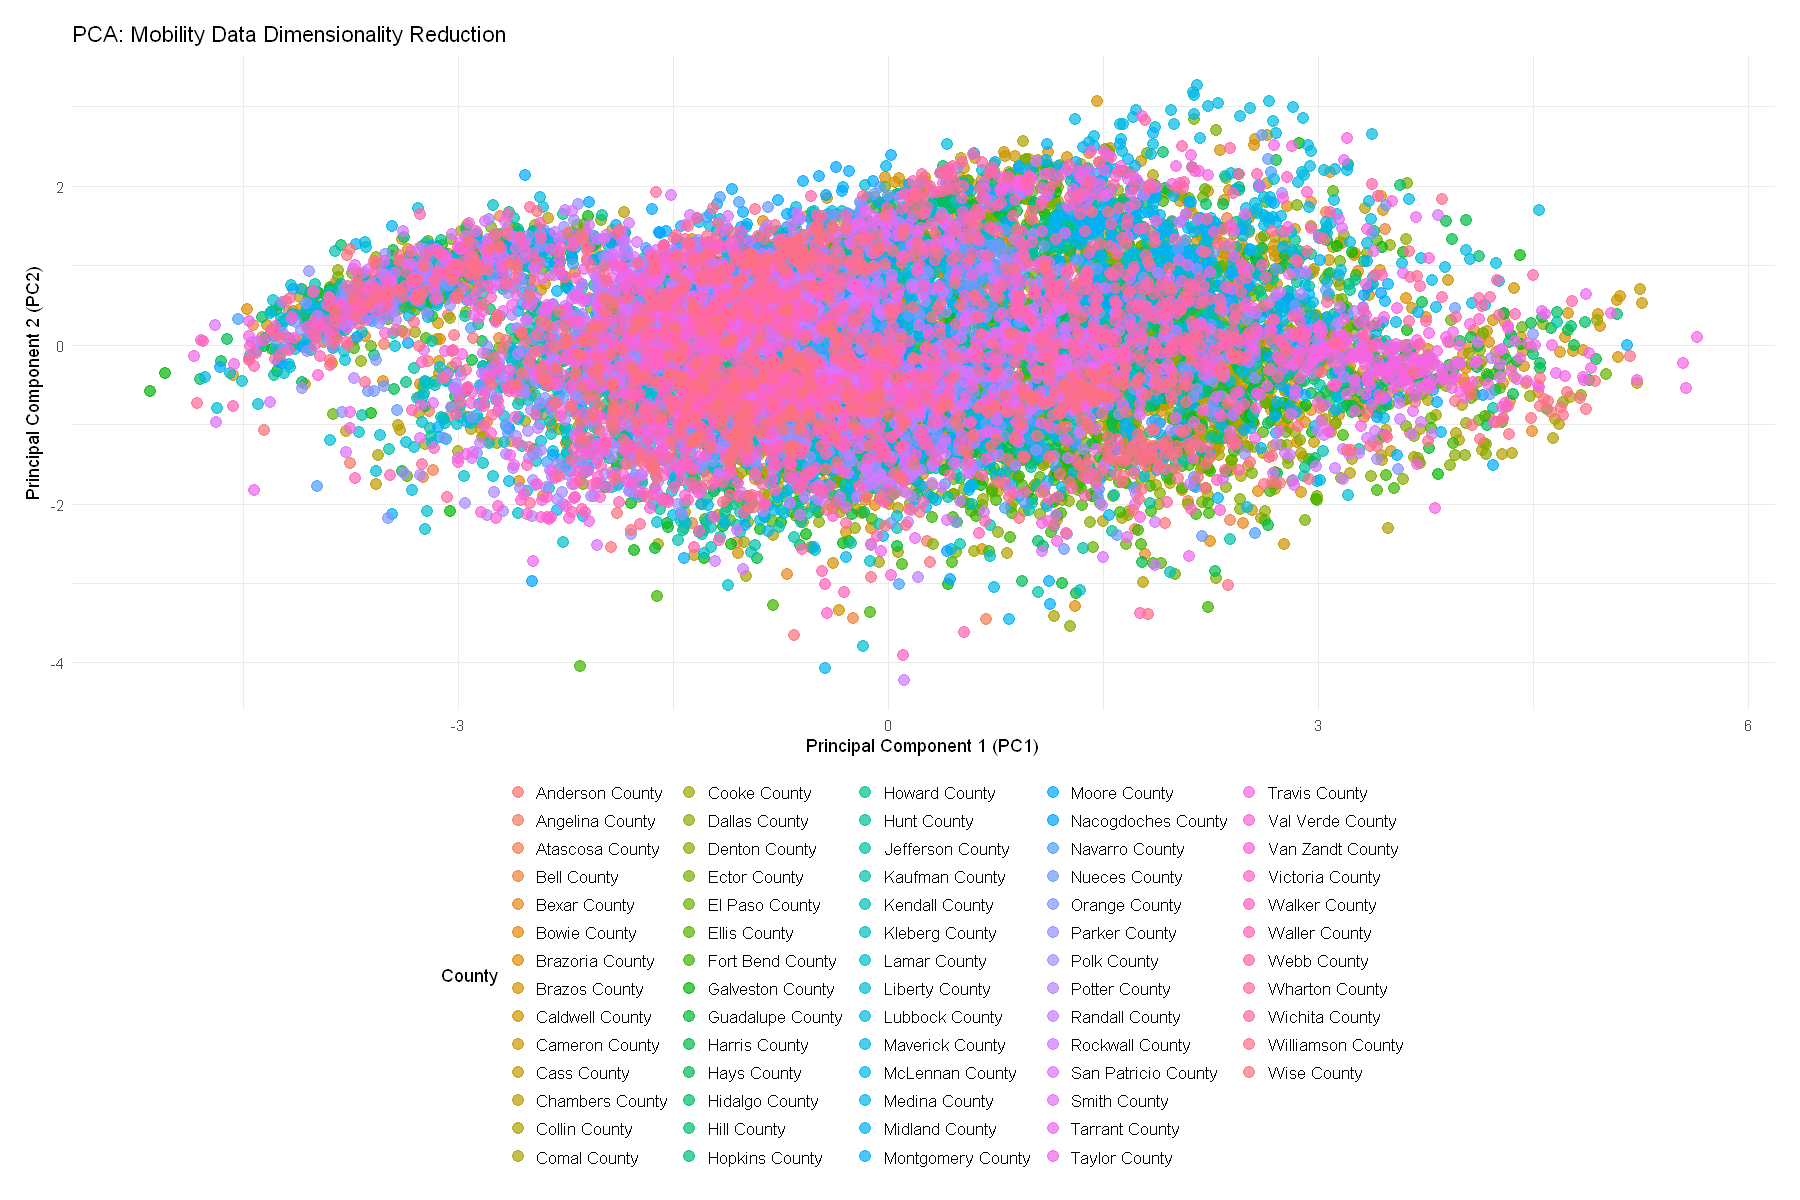

In [44]:
# PCA Plot (First Two Principal Components)
# Adjust plot size and improve visibility
pca_plot <- ggplot(biplot_data, aes(x = PC1, y = PC2, color = County)) +
  geom_point(alpha = 0.7, size = 3) + 
  labs(
    title = "PCA: Mobility Data Dimensionality Reduction",
    x = "Principal Component 1 (PC1)", 
    y = "Principal Component 2 (PC2)",
    color = "County"
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",  
    legend.key.size = unit(0.4, "cm"),  
    legend.text = element_text(size = 10), 
    plot.margin = margin(15, 15, 15, 15) 
  ) +
  guides(color = guide_legend(ncol = 5))  

# Increase figure size 
options(repr.plot.width = 15, repr.plot.height = 10)

# Display the plot
print(pca_plot)

# Save the plot with adjusted dimensions
ggsave("pca_plot.png", plot = pca_plot, width = 12, height = 10, dpi = 300)

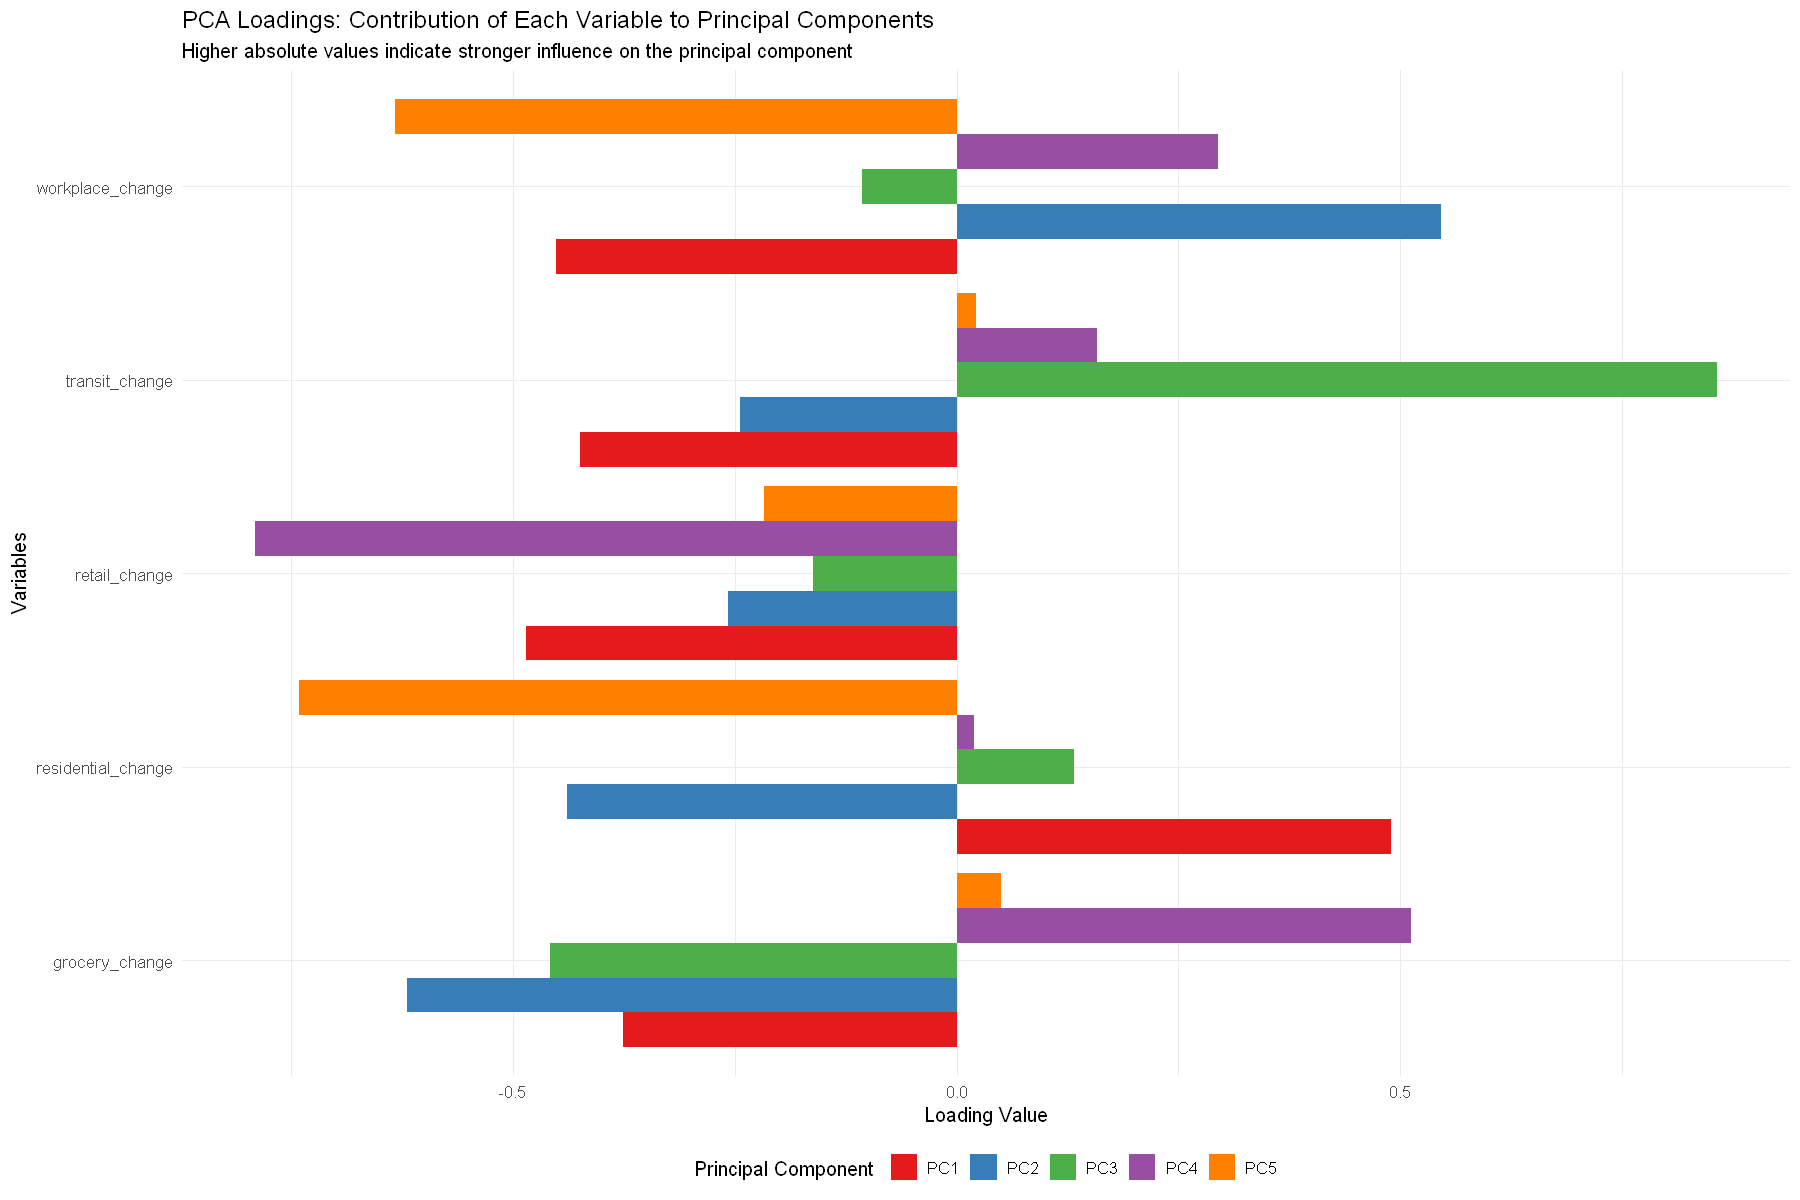

In [45]:
# Convert wide to long format
loading_df_long <- pca_loadings %>%
  pivot_longer(cols = -Variable, names_to = "PC", values_to = "loading_value")

# Create PCA Loadings Plot
ggplot(loading_df_long, aes(x = Variable, y = loading_value, fill = PC)) +
  geom_bar(stat = "identity", position = "dodge") +  
  coord_flip() + 
  scale_fill_brewer(palette = "Set1") + 
  theme_minimal() +
  theme(
    text = element_text(size = 12),  
    legend.position = "bottom",  
    axis.text.y = element_text(size = 10)  
  ) +
  labs(
    title = "PCA Loadings: Contribution of Each Variable to Principal Components",
    subtitle = "Higher absolute values indicate stronger influence on the principal component",
    x = "Variables", 
    y = "Loading Value",
    fill = "Principal Component"
  )

In [46]:
# Prints the PCA loadings
print(pca$rotation, 4)

                       PC1     PC2     PC3      PC4      PC5
retail_change      -0.4847 -0.2579 -0.1615 -0.79081 -0.21710
grocery_change     -0.3762 -0.6193 -0.4583  0.51226  0.05036
workplace_change   -0.4518  0.5457 -0.1069  0.29443 -0.63244
residential_change  0.4891 -0.4392  0.1328  0.01992 -0.74152
transit_change     -0.4246 -0.2436  0.8572  0.15851  0.02207


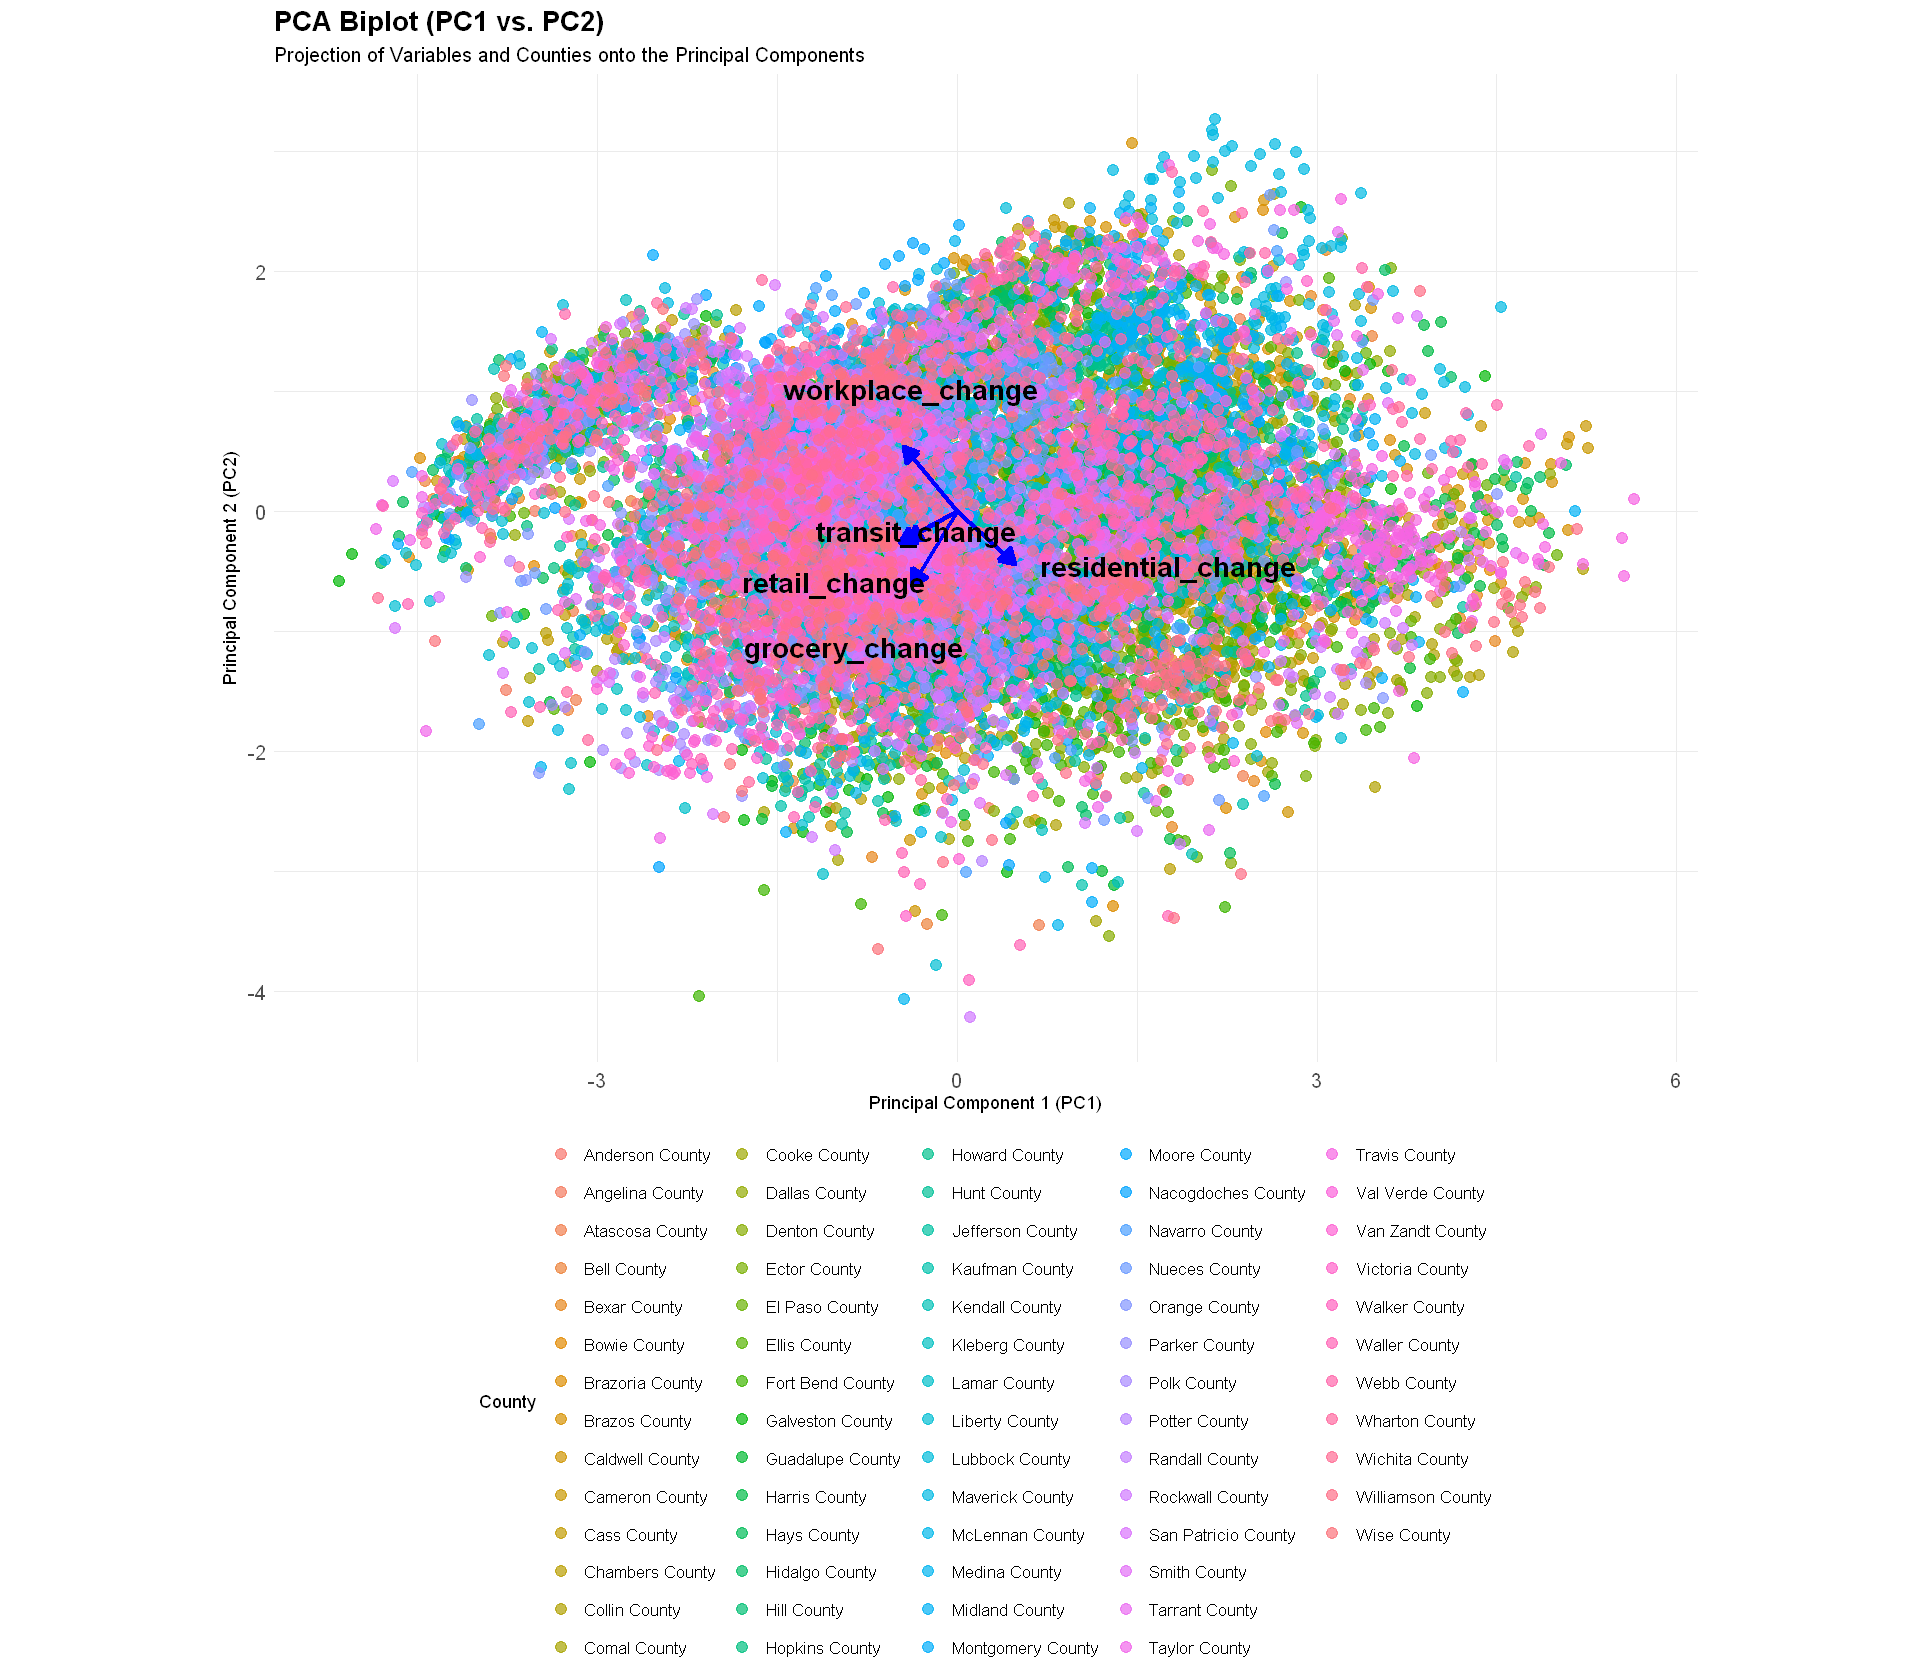

In [47]:
# Adjust plot size 
options(repr.plot.width = 16, repr.plot.height = 14)

# PCA Biplot PC1 vs PC2
ggplot(biplot_data, aes(x = PC1, y = PC2, color = County)) +
  geom_point(alpha = 0.7, size = 3) +  
  geom_segment(data = pca_loadings, 
               aes(x = 0, y = 0, xend = PC1, yend = PC2), 
               arrow = arrow(type = "closed", length = unit(0.15, "inches")), 
               color = "blue", linewidth = 1.2) +  
  geom_text_repel(data = pca_loadings, 
                  aes(x = PC1 * 1.5, y = PC2 * 1.5, label = Variable), 
                  color = "black", size = 6, fontface = "bold", 
                  box.padding = 0.5, 
                  point.padding = 0.5, 
                  max.overlaps = 10) +
  labs(
    title = "PCA Biplot (PC1 vs. PC2)",
    subtitle = "Projection of Variables and Counties onto the Principal Components",
    x = "Principal Component 1 (PC1)", 
    y = "Principal Component 2 (PC2)"
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom", 
    legend.text = element_text(size = 10), 
    axis.text = element_text(size = 12), 
    plot.title = element_text(size = 16, face = "bold"),  
    plot.subtitle = element_text(size = 12)  
  ) +
  coord_fixed(ratio = 1)  

In [48]:
# Extract PCA Loadings for PC1 and PC2
pca_loadings_pc1_pc2 <- as.data.frame(round(pca$rotation[, 1:2], 4))  
pca_loadings_pc1_pc2$Variable <- rownames(pca_loadings_pc1_pc2)  
rownames(pca_loadings_pc1_pc2) <- NULL  

# Print PCA Loadings Summary for PC1 and PC2
print("PCA Loadings for PC1 and PC2:")
print(pca_loadings_pc1_pc2)

[1] "PCA Loadings for PC1 and PC2:"
      PC1     PC2           Variable
1 -0.4847 -0.2579      retail_change
2 -0.3762 -0.6193     grocery_change
3 -0.4518  0.5457   workplace_change
4  0.4891 -0.4392 residential_change
5 -0.4246 -0.2436     transit_change


In [49]:
# Extract variance explained by PC1 and PC2
explained_variance_pc1_pc2 <- round(sum(pca$sdev[1:2]^2) / sum(pca$sdev^2) * 100, 2)

# Print explained variance for PC1 and PC2
print(paste("PC1 and PC2 together explain", explained_variance_pc1_pc2, "% of the total variance."))

[1] "PC1 and PC2 together explain 83.05 % of the total variance."


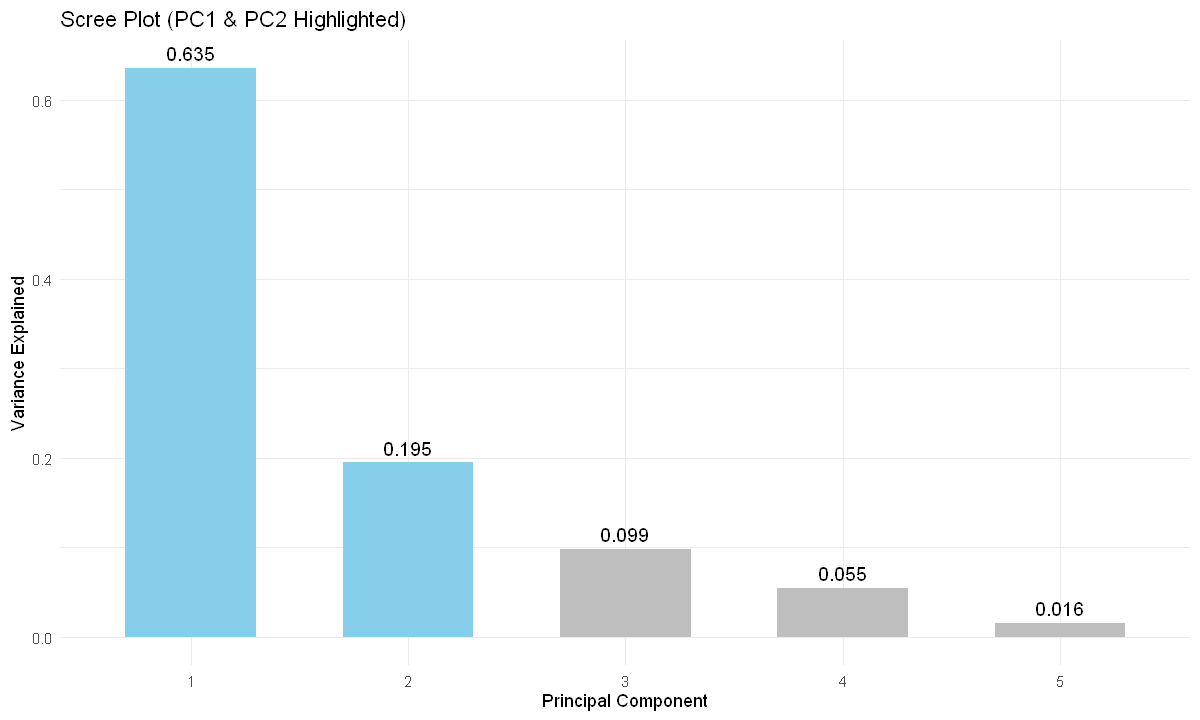

In [50]:
# Reduce plot size
options(repr.plot.width = 10, repr.plot.height = 6)

# Scree Plot Data
scree_data <- data.frame(PC = 1:length(pca$sdev), Variance = pca$sdev^2 / sum(pca$sdev^2))

# Ensure PC is a factor 
scree_data$PC <- factor(scree_data$PC)

# Highlight PC1 & PC2
ggplot(scree_data, aes(x = PC, y = Variance, fill = (PC %in% c("1", "2")))) +
  geom_bar(stat = "identity", width = 0.6) +
  geom_text(aes(label = round(Variance, 3)), vjust = -0.5, size = 4) +
  scale_fill_manual(values = c("gray", "skyblue"), guide = "none") + 
  labs(title = "Scree Plot (PC1 & PC2 Highlighted)", 
       x = "Principal Component", y = "Variance Explained") +
  theme_minimal()